In [ ]:
import matplotlib.pyplot as plt
import numpy as np

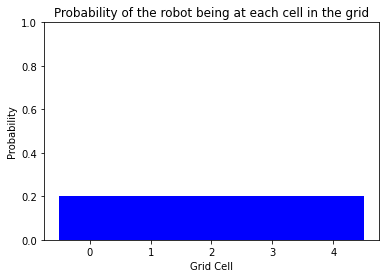

In [ ]:
p = [0.2, 0.2, 0.2, 0.2, 0.2]

def display_map(grid, bar_width=1):
  if(len(grid) > 0):
    x_labels = range(len(grid))
    plt.bar(x_labels, height=grid, width=bar_width, color='b')
    plt.xlabel('Grid Cell')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.title('Probability of the robot being at each cell in the grid')
    plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
  else:
    print('Grid is empty')
  
display_map(p)

In [ ]:
import random
def initialize_robot(grid_length):
  p = np.empty([grid_length, 2])
  for i in range(grid_length):
    p[i,0] = 1/grid_length
    p[i,1] = random.randint(0,1)
  grid = p[:,0]
  return p, grid

[[0.2 1. ]
 [0.2 1. ]
 [0.2 0. ]
 [0.2 0. ]
 [0.2 0. ]]


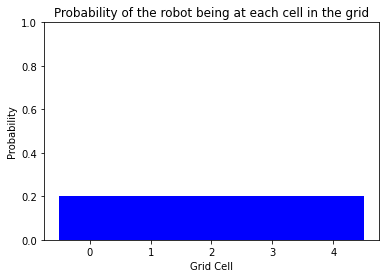

In [ ]:
p, grid = initialize_robot(5)
print(p)
display_map(grid)

In [ ]:
pHit = 0.6
pMiss = 0.2

def prob_calculation(dest_color, p):
  if dest_color == 'Green': 
    dest_num = 0
  else:
    dest_num = 1
  
  for i in range(p.shape[0]):
    if dest_num == p[i,1]:
      p[i,0] = p[i,0] * pHit
    else:
      p[i,0] = p[i,0] * pMiss
  grid = p[:,0]
  print(p)
  #display_map(grid)
  return p

[[0.04 1.  ]
 [0.04 1.  ]
 [0.12 0.  ]
 [0.12 0.  ]
 [0.12 0.  ]]


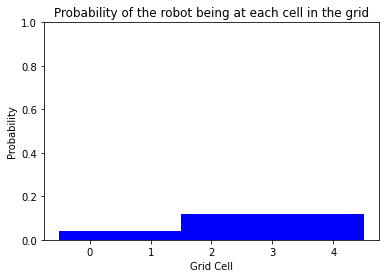

In [ ]:
measurements = ['Green']

for k in range(len(measurements)):
  new_p = prob_calculation(measurements[k], p)

display_map(new_p[:,0])

In [ ]:
total_prob = 0
for i in range(p.shape[0]):
  total_prob += p[i,0]
print(total_prob)

0.44


In [ ]:

p_udacity = [0.2, 0.2, 0.2, 0.2, 0.2]
world = ['green', 'red', 'red', 'green', 'green']
Z = 'red'
pHit = 0.6
pMiss = 0.2

def sense(p,Z):
  q = []
  for i in range(len(p)):
    hit = (Z == world[i])
    q.append(p[i] * (hit *pHit + (1-hit) * pMiss))
  return q

print(sense(p_udacity,Z))

[0.04000000000000001, 0.12, 0.12, 0.04000000000000001, 0.04000000000000001]


In [ ]:
def norm_prob(p):
  total_prob = np.sum(p[:,0])
  q = []
  for i in range(p.shape[0]):
    q.append(p[i,0] / total_prob)
  display_map(q)
  return q

[0.09090909090909093, 0.09090909090909093, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727]


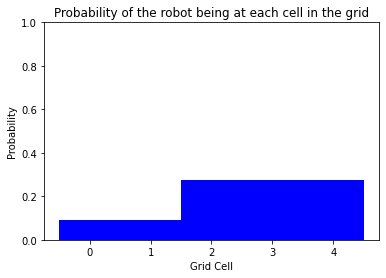

In [ ]:
norm_p = norm_prob(new_p)
print(norm_p)

In [ ]:
np.sum(norm_p)

1.0

In [ ]:

def sense(p, Z):
  q = []
  for i in range(len(p)):
    hit = (Z==world[i])
    q.append(p[i] * (hit * pHit + (1 - hit) * pMiss))
  s = sum(q)
  for i in range(len(p)):
    q[i] = q[i] / s
  return q

measurements = ['green', 'red']
for k in range(len(measurements)):
  sol_p = sense(p_udacity, measurements[k])

In [ ]:
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

def move(p, direction, steps):
  if direction == 'right':
    move_p = np.roll(p, steps)
  else:
    move_p = np.roll(p, -(steps))
  return move_p

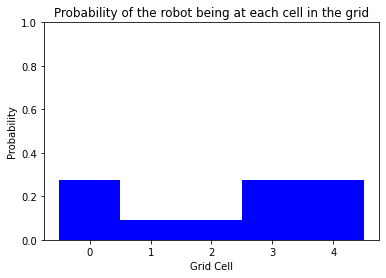

In [ ]:
move_p = move(norm_p, 'right',1)
display_map(move_p)

In [ ]:
# Udacity Solution
def move(p, U):
  q = []
  for i in range(len(p)):
    s = pExact * p[(i-U) % len(p)]
    s = s + pOvershoot * p[(i-U) % len(p)]
    s = s + pUndershoot * p[(i-U) % len(p)]
    q.append(s)
  return q

In [ ]:
initial_p = [1, 0, 0, 0, 0]
# 1 for green, 0 for red 
world = [1, 0, 0, 1, 1]
measurements = [0, 1]
# 1 for right 0 for left
motions = [1, 1]